Artefacts are weights or datafremaes..



In [6]:
import sys, os
sys.path.append('..')
from src.drone_em_dl import *
from datetime import datetime
import tensorflow as tf
import clearml
from clearml import Task
from pathlib import Path
import os
from clearml import Dataset

1. data
2. hyperparameters
3. upload iamges
4. pipelies:
    1. 

Hyperparameters:


In [24]:
from clearml import PipelineDecorator

In [26]:
# task 1. upload data


# task 2. preprocess data 
preprocess_args = {
    'random_state': 42,
    'test_size': 0.0

}
task.connect(preprocess_args)

In [25]:
from clearml import PipelineDecorator

@PipelineDecorator.component(return_values='raw_data')
def som():
    return raw_data

@PipelineDecorator.component(return_values='zscore_data')
def som():
    return zscore_data


@PipelineDecorator.component(return_values='normalized_data')
def som():
    return normalized_data

@PipelineDecorator.component(return_values='loss')
def main():
    Task.current_task().get_logger().report_scalar('loss')
    return normalized_data

@PipelineDecorator.pipeline()
if __name__ =="main":
    PipelineDecorator.set_default_execution_queue('default')



In [3]:
latent_space = 7
dropout = 0.1

Report parms

In [4]:
parameters = {
    'latent_space_size' : latent_space,
    'dropout': dropout
}

In [8]:
data = data.Data()
data.load_data('../data/raw/falster_data_Kristian.csv')
data.get_features([11,12,13,22,23,24,25,26,27,28,29,30,31]) #[1,2,3,4,5,6,7,8,9,10,11,12,13,14]  #[1,2,3,4,5,6,7,11,12,13,14,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
data.train_test_split(split=0.8)
data.norm_data()

ClearML results page: https://app.clear.ml/projects/89606797db624fca8e0dfda4f538f48d/experiments/4439580a84f448f48af960991167e732/output/log
ClearML dataset page: https://app.clear.ml/datasets/simple/89606797db624fca8e0dfda4f538f48d/experiments/4439580a84f448f48af960991167e732


/var/folders/82/fwjm77x535gfxv2dlbyp5l400000gp/T/ipykernel_55889/460737836.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1 = plt.figure()


Uploading dataset changes (1 files compressed to 3.64 MiB) to https://files.clear.ml
File compression and upload completed: total size 3.64 MiB, 1 chunk(s) stored (average size 3.64 MiB)


True

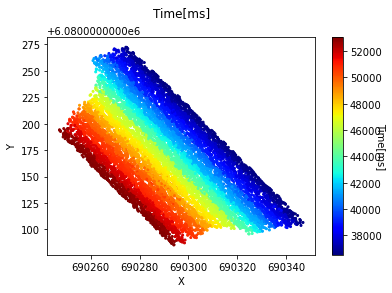

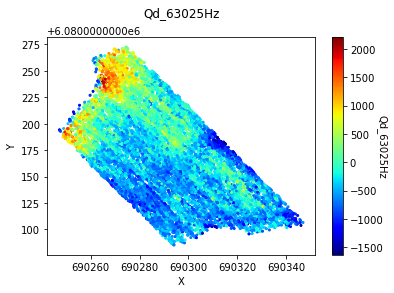

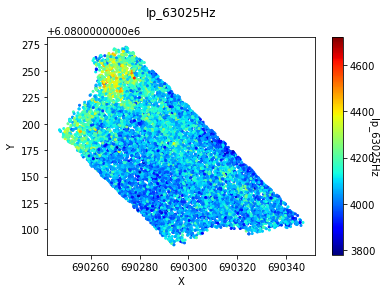

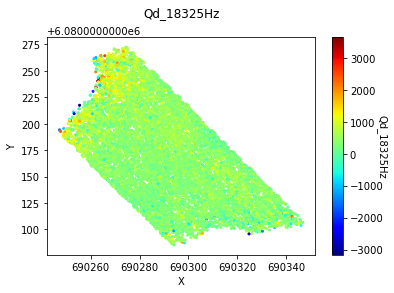

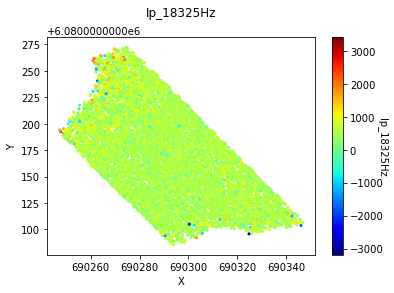

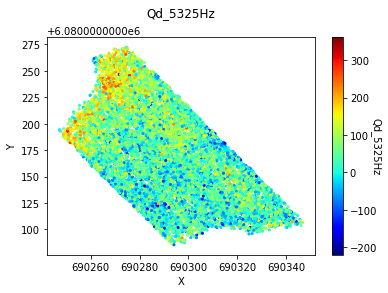

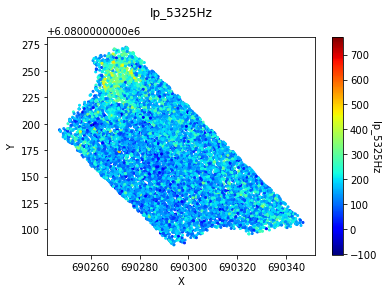

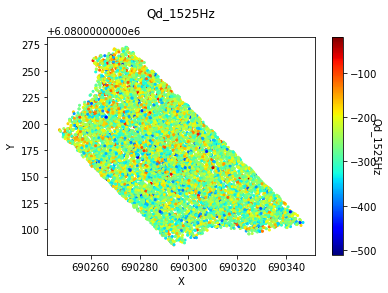

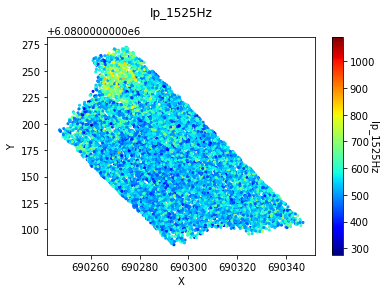

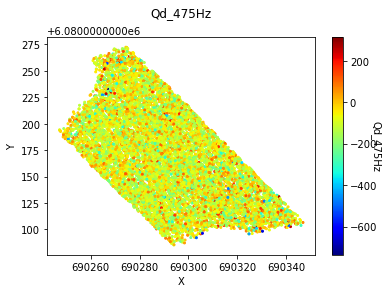

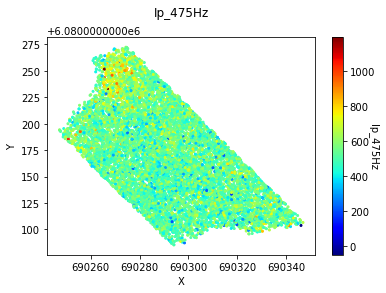

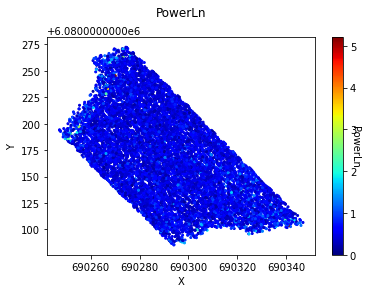

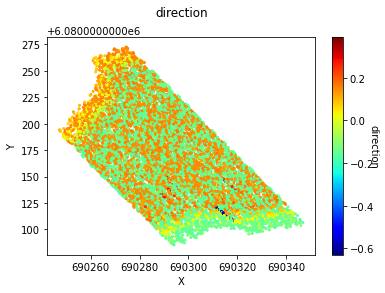

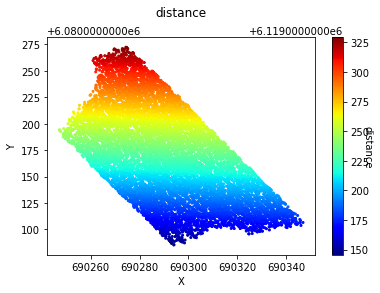

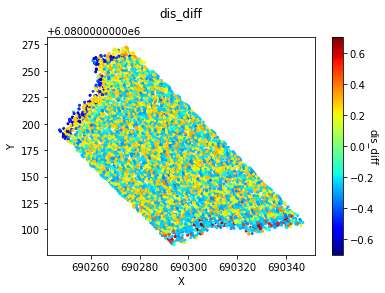

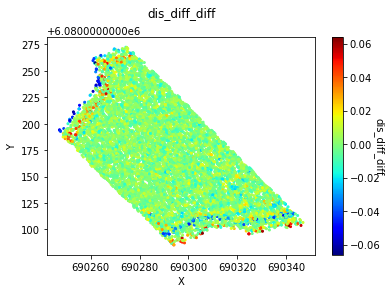

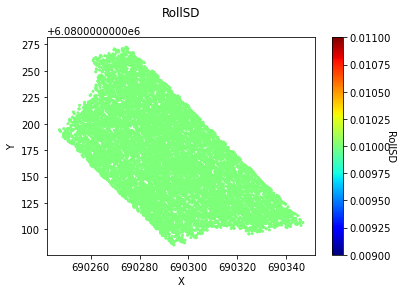

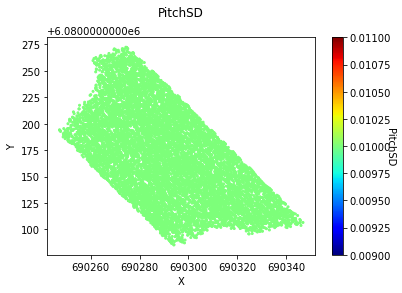

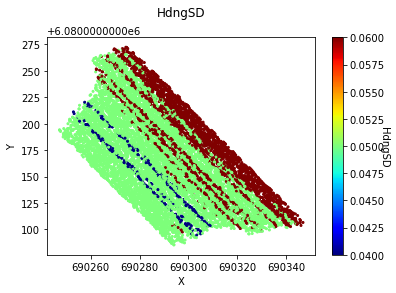

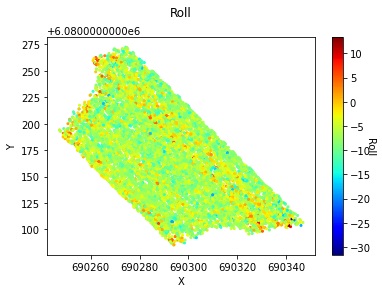

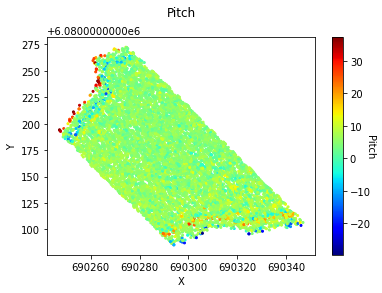

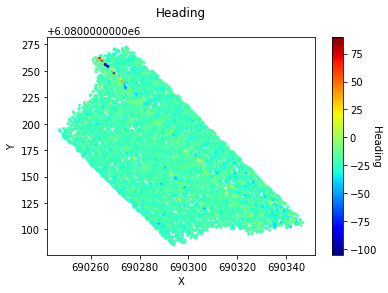

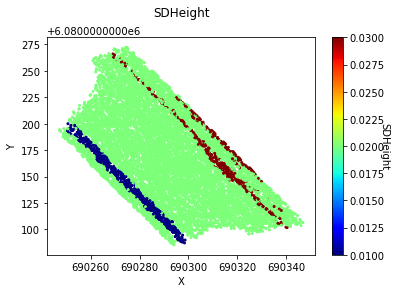

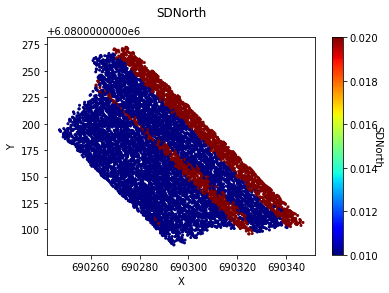

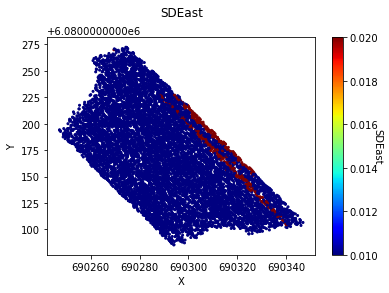

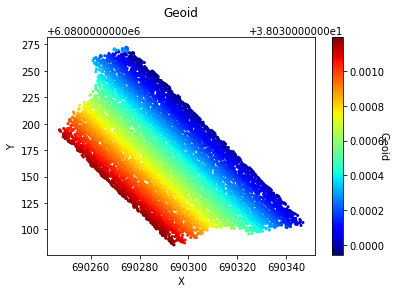

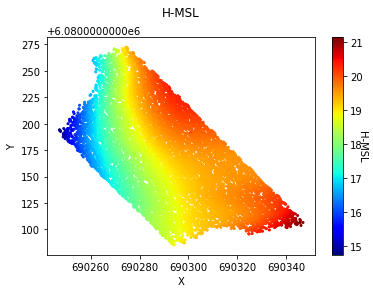

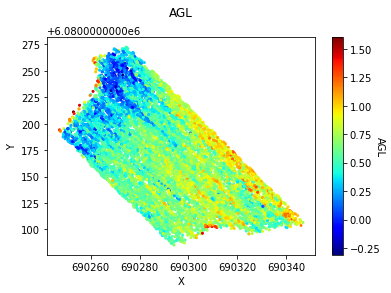

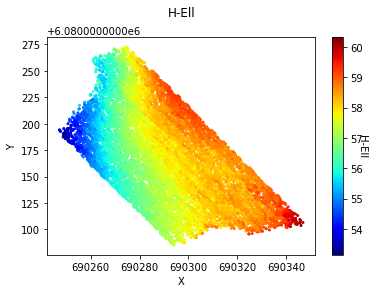

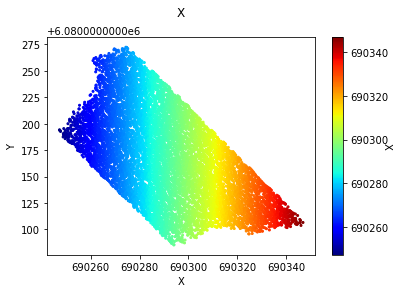

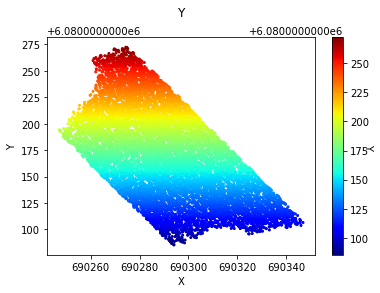

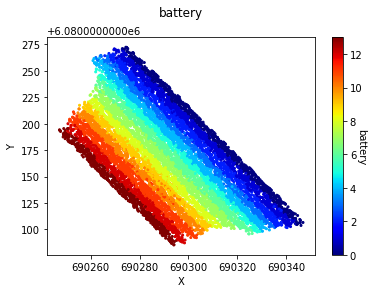

In [12]:
ds = Dataset.create(
    dataset_name = 'falster_raw',
    dataset_project = 'Drone_em_dl'
)

ds.add_files('../data/raw/falster_data_Kristian.csv')
for i in range(len(data.org_test.columns)):
    ds.get_logger().report_histogram(
        title = f"Histogram of train {data.org_test.columns[i]}",
        series = 'train data',
        values = data.org_test.iloc[:,i].values
    )
    fig1 = plt.figure()
    plt.scatter(data.org_test.X.values,data.org_test.Y.values, c = data.org_test.iloc[:,-i].values,cmap='jet',s=4)
    plt.title(f'{data.org_test.columns[-i]}\n')
    cbar = plt.colorbar()
    cbar.set_label(f'{data.org_test.columns[-i]}', rotation=270)
    plt.xlabel(('X'))
    plt.ylabel(('Y'))
    ds.get_logger().report_matplotlib_figure(
        title = f'Scatter: {data.org_test.columns[-i]}\n',
        series = 'training data',
        figure = fig1,
        report_image= True
    )

ds.upload()
ds.finalize()  

In [14]:
task = Task.init(project_name="Drone_em_dl", task_name=f"Drone_em_dl_test2")
task.connect(parameters,'hyperparameters')
#task.connect(args,'args')


ClearML Task: created new task id=b799abe42985446a9d50e897e40a75e3
ClearML results page: https://app.clear.ml/projects/d2611671b215498fb9b50456c1357c66/experiments/b799abe42985446a9d50e897e40a75e3/output/log
ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring


{'latent_space_size': 7, 'dropout': 0.1}

In [15]:
logger = task.get_logger()

In [ ]:
logger.report_matplotlib_figure(title=x_label, series=series, iteration=epoch, figure=plt,report_image=True)

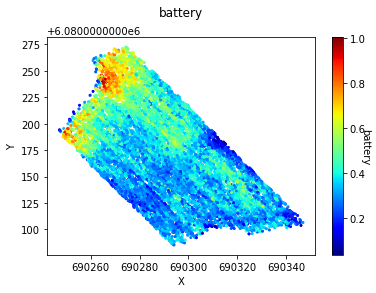

In [22]:
fig1 = plt.figure()
plt.scatter(data.org_test.X.values,data.org_test.Y.values, c = data.norm_data.norm_test[:,-1],cmap='jet',s=4)
plt.title(f'{data.org_test.columns[-i]}\n')
cbar = plt.colorbar()
cbar.set_label(f'{data.org_test.columns[-i]}', rotation=270)
plt.xlabel(('X'))
plt.ylabel(('Y'))

task.get_logger().report_matplotlib_figure(title='Debug Samples',
                                series='',
                                figure=fig1)



In [23]:

with Fae() as ae:
    ae = ae.make_model(
            input_size=data.norm_data.norm_train[0].shape,
            latent_space_dim=3,
            dense_neurons=[128,128,128,128,128,56,56,28,28],
            dropout_prob=0.1,
            name='test',
        )


Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2023-04-10 11:53:49.441117: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-10 11:53:49.441516: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [24]:
ae.summary()

Model: "test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 AE_input (InputLayer)       [(None, 13)]              0         
                                                                 
 encoder_model (Functional)  (None, 3)                 167978    
                                                                 
 decoder_model (Functional)  (None, 13)                83993     
                                                                 
Total params: 251,971
Trainable params: 247,123
Non-trainable params: 4,848
_________________________________________________________________


In [25]:
callbacks = get_callbacks(ae)

2023-04-10 11:53:54.545202: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2023-04-10 11:53:54.545221: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2023-04-10 11:53:54.545334: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [26]:


model_fit(
        ae,
        data.norm_data.norm_train,
        data.norm_data.norm_train,
        batch_size=200,
        epochs=100,
        verbose=1,
        callbacks=callbacks,
)

Epoch 1/100


2023-04-10 11:53:58.318811: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-10 11:54:01.840206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/225 [..............................] - ETA: 35:32 - loss: 2.2315 - mse: 2.2283 - lr: 0.0050

2023-04-10 11:54:07.865995: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2023-04-10 11:54:07.866009: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.


  2/225 [..............................] - ETA: 1:02 - loss: 2.0298 - mse: 2.0258 - lr: 0.0050 

2023-04-10 11:54:08.122146: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-04-10 11:54:08.128381: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2023-04-10 11:54:08.132463: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/test/plugins/profile/2023_04_10_11_54_08

2023-04-10 11:54:08.134460: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/test/plugins/profile/2023_04_10_11_54_08/spc-kaaso-mb.local.trace.json.gz
2023-04-10 11:54:08.141418: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/test/plugins/profile/2023_04_10_11_54_08

2023-04-10 11:54:08.141976: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/test/plugins/profile/2023_04_10_11_54_08/spc-kaaso-mb.local.memory_profile.json.gz
2023-04-10 11:54:08.1

225/225 [==============================] - ETA: 0s - loss: 0.0848 - mse: 0.0812 - lr: 0.0050

2023-04-10 11:54:42.756126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - 76s 295ms/step - loss: 0.0848 - mse: 0.0812 - lr: 0.0050 - val_loss: 0.0106 - val_mse: 0.0082 - val_lr: 0.0050
Epoch 2/100
225/225 [==============================] - 75s 335ms/step - loss: 0.0098 - mse: 0.0083 - lr: 0.0050 - val_loss: 0.0078 - val_mse: 0.0065 - val_lr: 0.0050
Epoch 3/100
225/225 [==============================] - 71s 315ms/step - loss: 0.0076 - mse: 0.0067 - lr: 0.0050 - val_loss: 0.0070 - val_mse: 0.0064 - val_lr: 0.0050
Epoch 4/100
225/225 [==============================] - 70s 312ms/step - loss: 0.0067 - mse: 0.0061 - lr: 0.0050 - val_loss: 0.0058 - val_mse: 0.0053 - val_lr: 0.0050
Epoch 5/100
147/225 [==================>...........] - ETA: 10s - loss: 0.0061 - mse: 0.0056 - lr: 0.0050

KeyboardInterrupt: 

Retrying (Retry(total=237, connect=238, read=239, redirect=240, status=240)) after connection broken by 'ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x36072f3d0>, 'Connection to api.clear.ml timed out. (connect timeout=10.0)')': /v2.23/tasks.ping
